# Statistical description of bike-sharing data in Washington, D.C. compared with prediction results using regression models and three machine learning models

| Author: Tiannan Ge | Word count: 2054 |
|---------------------|-------------------|

## Introduction

This report explores the hourly bike-sharing usage data for Washington, DC for 2011 and 2012 and analyses and interprets selected papers on the subject. The dataset was first cleaned, then statistically described, a correlation matrix was created, the relationships between the variable factors were analysed, and multiple linear regression, CART algorithm, random forest, and XGBoost algorithms were used for predictions, optimised the predicted results and determined the optimal prediction method.

The paper establishes the following workflow: data loading → data cleaning → descriptive statistics → multiple regression and machine learning → optimisation of models → discussion and conclusion. 

Textual interpretations and explanations are included in each section to explain the results of using multiple regression and the three machine learning methods separately by analysing the data in full.

Data sources：https://www.kaggle.com/datasets/marklvl/bike-sharing-dataset

The data csv and ipynb file has been uploaded to personal Github and the data source used in this report is Github：https://raw.githubusercontent.com/TiannanGe/CASA/main/CASA06Assessment/hour.csv
https://raw.githubusercontent.com/TiannanGe/CASA/main/CASA06Assessment/CASA06_Assessment.ipynb

CSV data dictionary：
- season: Season (1:springer, 2:summer, 3:fall, 4:winter)
- yr: Year (0: 2011, 1:2012)
- mnth: Month (1 to 12)
- hr: Hour (0 to 23)
- holiday: weather day is holiday or not (extracted from Holiday Schedule)
- weekday: Day of the week
- workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit: (extracted from Freemeteo)
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- cnt: count of total rental bikes including both casual and registered


## Literature review

In a similar study it can be found that Booz Allen Hamilton used random forests to rank the predictor variables when investigating the effect of weather conditions on the number of bike-sharing stations in the San Francisco Bay Area, showing through the results that temperature and humidity were significant influences throughout the day (Ashqar, Elhenawy and Rakha, 2019).Chang Gao et al. 

model predictions for bicycle sharing in Seoul found that LM performed worst in the training and test sets and much better in the random forest, suggesting a non-linear relationship between bicycle rental and explanatory variables (Gao and Chen, 2022).Sathishkumar V E et al. identified temperature and hour as the most important variables in predicting the number of bicycles rented per hour. In all the forecasting models, weather data was shown to improve the accuracy of the forecasts. And prediction accuracy was improved by using repeated cross-validation and models trained with optimal hyperparameters (E, Park and Cho, 2020).

## Research question

This film report raises two main issues:

Firstly, through descriptive statistics and correlation analysis, how did temperature and humidity, wind speed, date, and whether it was a holiday, affect the number of bicycle rentals?

Secondly, by using linear regression models and CART RF XGBoost three machine learning algorithms, to predict the data, to explore which method is the best predictive model?

***

## Preparation

### Loading support libraries

In [1]:
# Basic Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Machine Learning Library
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
# A library of special importance for random forests
import rfpimp
# Other support libraries such as visualisation
from datetime import datetime
import statsmodels.formula.api as smf
import seaborn as sns
pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format 
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

### Data Loading and Exploration

Loading hourly bikeshare usage data for Washington, DC from Github for 2011 and 2012.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/TiannanGe/CASA/main/CASA06Assessment/hour.csv')

In [3]:
#As you can see from the overview of the data in the table below, there are a total of 12 variables and 17,379 rows of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Delete non-essential fields

In [4]:
#Remove some fields that are not needed in this study
df = df.drop(['dteday'], axis=1)
df = df.drop(['instant'], axis=1)
df = df.drop(['registered'], axis=1)
df = df.drop(['casual'], axis=1)
df = df.drop(['atemp'], axis=1)
df = df.drop(['yr'], axis=1)

In [5]:
df

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.2400,0.8100,0.0000,16
1,1,1,1,0,6,0,1,0.2200,0.8000,0.0000,40
2,1,1,2,0,6,0,1,0.2200,0.8000,0.0000,32
3,1,1,3,0,6,0,1,0.2400,0.7500,0.0000,13
4,1,1,4,0,6,0,1,0.2400,0.7500,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,2,0.2600,0.6000,0.1642,119
17375,1,12,20,0,1,1,2,0.2600,0.6000,0.1642,89
17376,1,12,21,0,1,1,1,0.2600,0.6000,0.1642,90
17377,1,12,22,0,1,1,1,0.2600,0.5600,0.1343,61


***

## Descriptive statistics

### Data overview

The histograms of temperature, humidity, wind speed, and bicycle use, as well as the kernel density estimation curves, are shown below. It can be seen that the temperature in Washington State is normally distributed.

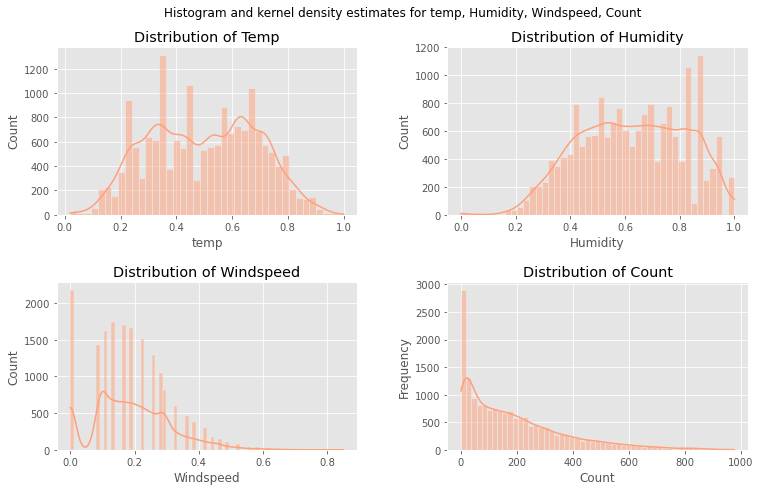

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the canvas size and number of subplots
fig, axes = plt.subplots(2, 2, figsize=(12,7))

# Histogram and kernel density estimates for temp
sns.histplot(df['temp'], ax=axes[0, 0], color='#FFA07A', kde=True)
axes[0, 0].set_xlabel('temp')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Temp')

# Histogram and kernel density estimates for hum
sns.histplot(df['hum'], ax=axes[0, 1], color='#FFA07A', kde=True)
axes[0, 1].set_xlabel('Humidity')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Humidity')

# Histogram and kernel density estimates for windspeed
sns.histplot(df['windspeed'], ax=axes[1, 0], color='#FFA07A', kde=True)
axes[1, 0].set_xlabel('Windspeed')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Windspeed')

# Histograms and kernel density estimates of cnt
sns.histplot(df['cnt'], ax=axes[1, 1], color='#FFA07A', kde=True)
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Count')

# Adjusting the distance between subplots and the top, bottom, left and right borders
plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.9, bottom=0.1, left=0.1, right=0.9)
plt.suptitle("Histogram and kernel density estimates for temp, Humidity, Windspeed, Count", )
plt.show()

The graphs below show the scatter plots of bike rentals (cnt) against the dependent variables of temperature, hours, humidity, wind speed, season, month, holiday, week and weekday respectively. A clear active trend can be seen in the temp scatter plot. 



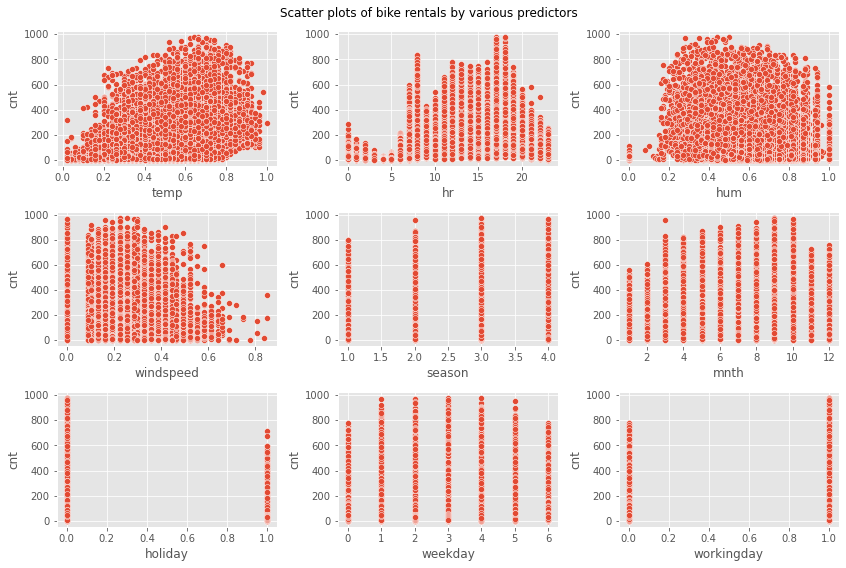

In [7]:
# Create a 3x3 graph matrix with each subgraph of size 8x8
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

# The horizontal axis of each subplot is the corresponding independent variable and the vertical axis is cnt.
sns.scatterplot(x='temp', y='cnt', data=df, ax=axs[0][0])
sns.scatterplot(x='hr', y='cnt', data=df, ax=axs[0][1])
sns.scatterplot(x='hum', y='cnt', data=df, ax=axs[0][2])
sns.scatterplot(x='windspeed', y='cnt', data=df, ax=axs[1][0])
sns.scatterplot(x='season', y='cnt', data=df, ax=axs[1][1])
sns.scatterplot(x='mnth', y='cnt', data=df, ax=axs[1][2])
sns.scatterplot(x='holiday', y='cnt', data=df, ax=axs[2][0])
sns.scatterplot(x='weekday', y='cnt', data=df, ax=axs[2][1])
sns.scatterplot(x='workingday', y='cnt', data=df, ax=axs[2][2])
plt.suptitle("Scatter plots of bike rentals by various predictors", )
plt.tight_layout()

The graphs below show the histograms of bike volume for a 24-hour day, 12 months of the year, and a 5-degree temperature gradient. 

Text(0.5, 0.98, 'Histogram of Hour, Monthly and Temp bicycle rentals')

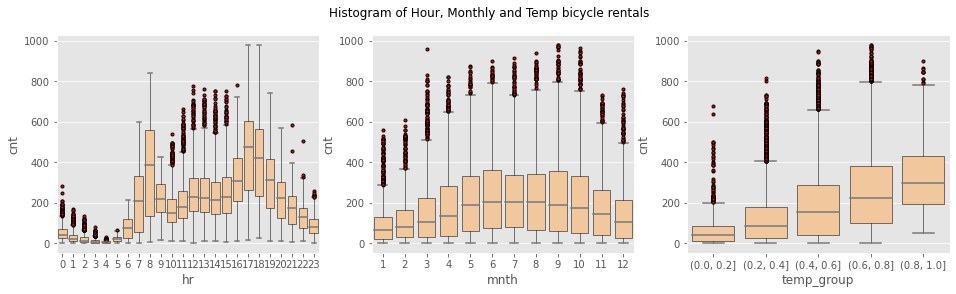

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

sns.boxplot(x=df['hr'], y=df['cnt'],color='#FFC78F',
           boxprops={'edgecolor':'black', 'linewidth': 0.5},
            whiskerprops={'color': 'black', 'linewidth': 0.5},
            fliersize=3, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black'},ax=ax[0])


sns.boxplot(x=df['mnth'], y=df['cnt'],color='#FFC78F',
           boxprops={'edgecolor':'black', 'linewidth': 0.5},
            whiskerprops={'color': 'black', 'linewidth': 0.5},
            fliersize=3, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black'},ax=ax[1])


df['temp_group'] = pd.cut(df['temp'], bins=np.arange(0, 1.2, 0.2))
sns.boxplot(x=df['temp_group'], y=df['cnt'],color='#FFC78F',
            boxprops={'edgecolor':'black', 'linewidth': 0.5},
            whiskerprops={'color': 'black', 'linewidth': 0.5},
            fliersize=3, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black'})
plt.suptitle("Histogram of bicycle rentals with a temperature interval of 5",y=0.95)

plt.suptitle("Histogram of Hour, Monthly and Temp bicycle rentals")

The following set of graphs show the distribution of cycling volume in different weather conditions, whether it is a holiday and whether it is a weekday, and for each day from Monday to Sunday, where S stands for Sunny and H stands for Heavy snow/rain, it is clear that good weather has a positive effect on cycling. The demand for cycling on weekdays is significantly higher than when it is a holiday, and there is also more cycling from Monday to Friday than on Saturday and Sunday, mainly because the majority of cyclists' cycling demand is for commuting to and from work, as evidenced in the 24-hour cycling distribution graph.

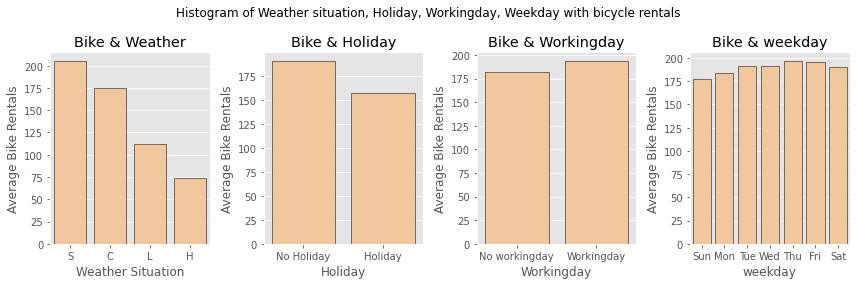

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
weathersit = {1: 'Sunny', 2:'Cloudy', 3:'Light S/R', 4:'Heavy S/R'}

sns.barplot(data=df, x='weathersit', y='cnt', estimator=np.mean, color='#FFC78F', edgecolor='black', linewidth=0.5, ci=None, ax=ax[0])
ax[0].set_xlabel('Weather Situation')
ax[0].set_ylabel('Average Bike Rentals')
ax[0].set_xticklabels(['S', 'C', 'L', 'H'])
ax[0].set_title("Bike & Weather")

sns.barplot(data=df, x='holiday', y='cnt', estimator=np.mean, color='#FFC78F', edgecolor='black', linewidth=0.5, ci=None, ax=ax[1])
ax[1].set_xlabel('Holiday')
ax[1].set_ylabel('Average Bike Rentals')
ax[1].set_xticklabels(['No Holiday', 'Holiday'])
ax[1].set_title("Bike & Holiday")

sns.barplot(data=df, x='workingday', y='cnt', estimator=np.mean, color='#FFC78F', edgecolor='black', linewidth=0.5, ci=None, ax=ax[2])
ax[2].set_xlabel('Workingday')
ax[2].set_ylabel('Average Bike Rentals')
ax[2].set_xticklabels(['No workingday', 'Workingday'])
ax[2].set_title("Bike & Workingday")

sns.barplot(data=df, x='weekday', y='cnt', estimator=np.mean, color='#FFC78F', edgecolor='black', linewidth=0.5, ci=None, ax=ax[3])
ax[3].set_xlabel('weekday')
ax[3].set_ylabel('Average Bike Rentals')
ax[3].set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
ax[3].set_title("Bike & weekday")

plt.suptitle("Histogram of Weather situation, Holiday, Workingday, Weekday with bicycle rentals")
plt.tight_layout()
df = df.drop(['temp_group'], axis=1)

## Related Matrix

Calculating the correlation coefficient between variables can help to understand the degree of linearity between them. 

In [10]:
corr = df.corr()
corr['cnt']

season                                         0.1781
mnth                                           0.1206
hr                                             0.3941
holiday                                       -0.0309
weekday                                        0.0269
workingday                                     0.0303
weathersit                                    -0.1424
temp                                           0.4048
hum                                           -0.3229
windspeed                                      0.0932
cnt                                            1.0000
Name: cnt, dtype: float64

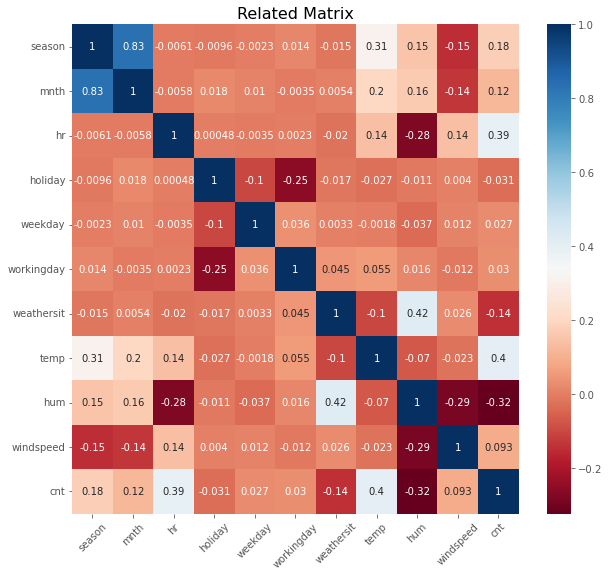

In [11]:
f = plt.figure(figsize=(10, 9)) 
sns.heatmap(df.corr(), annot=True, cmap='RdBu', xticklabels=True, yticklabels=True)
plt.title('Related Matrix', fontsize=16)
_ = plt.xticks(rotation=45)

The correlation matrix above shows a clear correlation between hours, weather conditions, temperature and humidity, where the worse the weather, the higher the humidity and the lower the temperature, the more pronounced the suppression of cycling, while the opposite has a positive effect. The season, month and whether it is a weekday or not do not correlate as much with the number of bicycle rentals.

***

## Model predictions

## Building a multiple regression linear model

### Find and remove multicollinearity

In order to make the linear regression more accurate, it is first necessary to find and remove the multicollinearity and exclude the linear covariance factor. The VIF function is defined below.

In [12]:
# calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=3):

    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break
    return df

In [13]:
df_VIF = drop_column_using_vif_(df.drop('cnt', axis=1))

Dropping: season


### Fitting a linear regression model

The VIF function detects the presence of multicollinearity in the 'season' is independent variable, which needs to be removed and the data set removed for multiple linear regression.

In [14]:
# Now let's run a multiple linear regression
# The temp variable is no longer significant. Why? Multicollinearity
est_m = smf.ols(formula='cnt ~ hr + mnth + holiday + weekday + workingday + weathersit + temp + hum + windspeed', 
                data=df).fit()
est_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     969.8
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:56:28   Log-Likelihood:            -1.1150e+05
No. Observations:               17379   AIC:                         2.230e+05
Df Residuals:                   17369   BIC:                         2.231e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.7222      6.889      6.927      0.000      34.219      61.225
hr             7.4577      0.172     43.404      0.000       7.121       7.794
mnth           5.0336      0.341     14.764      0.000       4.365       5.702
holiday      -24.2774      6.977     -3.479      0.001     -37.954     -10.601
weekday        1.4654      0.564      2.600      0.009       0.361       2.570
workingday     3.7455      2.500      1.498      0.134      -1.154       8.645
weathersit    -2.2281      1.984     -1.123      0.261      -6.117       1.661
temp         309.4531      6.064     51.032      0.000     297.567     321.339
hum         -217.4247      7.142    -30.445      0.000    -231.423    -203.426
windspeed     11.6607      9.779      1.192      0.233      -7.508      30.829
==============================================================================
Omnibus:                     4267.267   Durbin-Watson:                   0.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9816.596
Skew:                           1.391   Prob(JB):                         0.00
Kurtosis:                       5.413   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The multiple linear regression model has an R-squared of only 0.334, indicating the presence of non-linear relationships that are difficult for the model to capture, resulting in a poor fit. Although some independent variables are found to be insignificant, they will not be removed as they may still have an impact on the machine learning algorithm's performance. 

Machine learning algorithms can better handle non-linearities and interactions that are difficult to capture in a linear regression model. Therefore, a machine learning algorithm will be used to make predictions.

***

## Machine learning

### Preparation for Machine learning methods : Splitting data into random train and test subsets

The prep work for machine learning is to randomly split the data into training and test datasets. This code uses the train_test_split function, which removes the cnt column from df and uses all the remaining columns as the independent variables train_x and test_x. df.cnt then indicates the cnt column as the dependent variables train_y and test_y. The random_state_split parameter specifies the random number seed, which is used to ensure that the random split obtained is the same each time the program is run. In this split, the default ratio of 75% training set and 25% test set was used.

In [15]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(df.drop(['cnt'], axis = 1), df.cnt, random_state=random_state_split)

Outputting the dimensions of the training and test sets, 13034 rows of data were used for training and 4345 rows of data were used to test the performance of the model. In the index check below, it can be determined that the indexes are identical, proving that the data was successfully cut.

In [16]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))
# In the regression model, we will use the training set to train the model and select the hyperparameters. 
#The test set will only be used to report on the performance of the finalised model.

(13034, 10)
(13034,)
(4345, 10)
(4345,)
True
True


## Method 1:Building the CART model

### Tuning the hyperparameters using cross validation

A CART decision tree regression model is first created using the default parameters and fitted to the training data. random_state is used to set a random number seed to ensure that the same result is obtained each time the program is run. The get_depth function is used to obtain the depth of the decision tree, i.e. the maximum number of branches in the tree. The maximum tree depth is 32 by default.

Some times decision tree models trained with the default parameters may suffer from overfitting and need to be tuned to optimise the performance of the model.

In [17]:
# a CART using default settings
cart_default = DecisionTreeRegressor(random_state=0)
cart_default.fit(train_x, train_y)
# This line of code uses the training data train_x and train_y to train the CART model cart_default.
# print the tree depth
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 32


In order to find the best hyperparameter, a cross-validation technique was used. After five cross-validations, max_depth was found around the default depth of 32 as previously calculated, and 'min_samples_split was 2 by default, in increments of 2. The hyperparameter was gradually determined after testing different data several times when 'max_depth': 24, 'min_ samples_split': 38, the highest score of 0.8126 was achieved.

In [18]:
hyperparameters = {'max_depth':[22,24,26,28,30,32,34,36], 'min_samples_split':[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42]}
randomState_dt = 10000
dt = DecisionTreeRegressor(random_state=randomState_dt)
# By default Cv = 5, which means 5 cross-validations
clf = GridSearchCV(dt, hyperparameters)
clf.fit(train_x, train_y)
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 24, 'min_samples_split': 38}
The best score is: 
0.8126674795359502


### Training the final CART

Bringing the previously measured optimal parameter values into the new CART model and retraining it, we can see that the R2 result is 0.87 for the training set and 0.81 for the test set, which is a relatively good result, but there may be an overfitting problem as it performs somewhat better on the training set than on the test set. But looking at R2 alone does not allow a firm conclusion to be drawn, one needs to continue to look at RMSE, MSE and MAE.

In [19]:
dt_final = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=24, min_samples_split=38, random_state=10000)

### R2 results for CART

In [20]:
print("R2 on the training data:")
print(dt_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(dt_final.score(X=test_x, y=test_y))

R2 on the training data:
0.8764086702346677
R2 on the testing data:
0.8185105086949652


### RMSE results for CART

In [21]:
print("RMSE on the training data:")
print(mean_squared_error(train_y, dt_final.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, dt_final.predict(test_x), squared=False))

RMSE on the training data:
63.7866611625406
RMSE on the testing data:
77.17337759151903


From the results of the RMSE, the prediction error of the model on the training set is about 63.78, while the prediction error on the test set is about 77.17, indicating that the model performs relatively well on the training and test sets, but the error on the test set is larger than that on the training set, which may have some overfitting problems.

### MSE and MAE results for CART

In [22]:
# Calculate MSE and MAE on training data
train_pred = dt_final.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)
train_mae = mean_absolute_error(train_y, train_pred)

# Calculate MSE and MAE on testing data
test_pred = dt_final.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)
test_mae = mean_absolute_error(test_y, test_pred)

print("MSE on the training data:")
print(train_mse)
print("MSE on the testing data:")
print(test_mse)
print("MAE on the training data:")
print(train_mae)
print("MAE on the testing data:")
print(test_mae)

MSE on the training data:
4068.738142264765
MSE on the testing data:
5955.73020888317
MAE on the training data:
41.10139114399587
MAE on the testing data:
49.511437573247505


The values of these evaluation metrics, like the previous RMSE evaluation metrics, also indicate that there is some overfitting of the model. large values of MSE and MAE indicate that the model has a large prediction error for some samples and needs to further optimise the model or add more features.

## Feature importance for the CART

This code outputs the depth and the number of leaf nodes of the CART model.

In [23]:
print("Tree depth:{}".format(dt_final.get_depth()))
print("Number of leaves:{}".format(dt_final.get_n_leaves()))

Tree depth:21
Number of leaves:717


The mportances function returns a data frame consisting of two columns, features and importance, with features ranked from most important to least important.

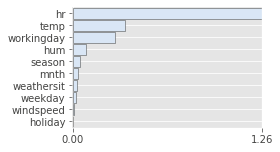

In [24]:
imp = rfpimp.importances(dt_final, test_x, test_y)
viz = rfpimp.plot_importances(imp)
viz.view()

The feature importance above shows that the most important features are hour, temperature, whether it is a working day, and humidity. Next, we will compare the feature importance of CART, RF and GBDT.

***

## Method 2:Building a random forest

At the time of writing this study, the hyperparameters array of the random forest was defined as hyperparameters = {'max_depth':[18,20,22,24,26,28], 'min_samples_split':[2,4,6,8,10]}, and it was tested that when max_depth was 24 and min_ samples_split is 4, the best score is 0.855. In order to save time and be able to reproduce quickly, in the following code box, set 'max_depth':24 and 'min_samples_split':4 directly.

In [25]:
# values of max_depth and min_samples_split
#hyperparameters = {'max_depth':[18,20,22,24,26,28], 'min_samples_split':[2,4,6,8,10]}
hyperparameters = {'max_depth':[24], 'min_samples_split':[4]}
randomState_dt = 10000
rf = RandomForestRegressor(random_state=randomState_dt)
# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(rf, hyperparameters)
clf.fit(train_x, train_y)
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 24, 'min_samples_split': 4}
The best score is: 
0.8555356888922386


In [26]:
rf_final = RandomForestRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
rf_final.fit(train_x, train_y)

RandomForestRegressor(max_depth=24, min_samples_split=4, random_state=10000)

### R2 results for RF

In [27]:
print("R2 on the training data:")
print(rf_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(rf_final.score(X=test_x, y=test_y))

R2 on the training data:
0.9720059975876362
R2 on the testing data:
0.8698526972829382


The R2 results can be seen that compared to CART, RF achieved an R2 of 0.97 on the training set and 0.86 on the test set. Compared to the decision tree, the random forest generalised better on the test set, indicating that it performs better when dealing with unknown data. However, the model scored much higher on the training set than the test set, and there was a degree of overfitting. If the overfitting problem can be alleviated by adjusting the hyperparameters of the model or adding more training data, it may further improve the performance of the model.

### RMSE results for RF

In [28]:
print("RMSE on the training data:")
print(mean_squared_error(train_y, rf_final.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, rf_final.predict(test_x), squared=False))

RMSE on the training data:
30.357665089948654
RMSE on the testing data:
65.3520706212857


Compared to the RMSE score of CART, the score of RF is much lower. A smaller RMSE means that the difference between the prediction result of the model and the true value is smaller, i.e. the model is better at prediction. So the lower RMSE means that the random forest prediction is better than CART.

### MSE and MAE results for RF

In [29]:
# Calculate MSE and MAE on training data
train_pred = rf_final.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)
train_mae = mean_absolute_error(train_y, train_pred)

# Calculate MSE and MAE on testing data
test_pred = rf_final.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)
test_mae = mean_absolute_error(test_y, test_pred)

print("MSE on the training data:")
print(train_mse)
print("MSE on the testing data:")
print(test_mse)
print("MAE on the training data:")
print(train_mae)
print("MAE on the testing data:")
print(test_mae)

MSE on the training data:
921.5878297134872
MSE on the testing data:
4270.8931344895145
MAE on the training data:
19.48109179485142
MAE on the testing data:
42.93935185558525


Compared to decision trees, random forests have significantly lower MSE and MAE results, which means that random forests are better at predicting the target variables and reducing prediction errors.

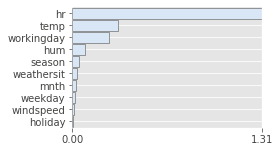

In [30]:
imp = rfpimp.importances(rf_final, test_x, test_y)
viz = rfpimp.plot_importances(imp)
viz.view()

As can be seen, the ranking of the special importance of Random Forest is exactly the same as that of CART. 

***

## Method 3:Building a XGBoost model

At the time of writing this study, the hyperparameters array of XGBoost was defined as hyperparameters = {'max_depth':[5,10,15,20,25,30,35,40], 'min_samples_split':[50,100,150,200,250,300]}, and the test showed max_depth is 5, min_samples_split is 300, and the best score is 0.8724. In order to save time and be able to reproduce it quickly, in the following code box, set 'max_depth':5 and 'min_samples_split' 300 directly.

In [31]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[5], 'n_estimators':[300]}

randomState_xgb = 125
xgb = XGBRegressor(random_state=randomState_xgb)

# cv=5 by default, which means 5-fold cross-validation
gscv_xgb = GridSearchCV(xgb, hyperparameters)

gscv_xgb.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (gscv_xgb.best_params_)
print ("The best score is: ")
print (gscv_xgb.best_score_)

The best parameter value is: 
{'max_depth': 5, 'n_estimators': 300}
The best score is: 
0.872406178587833


The optimal hyperparameters are brought into the XGBoost model for final model training.

In [32]:
xgb_final = XGBRegressor(max_depth=gscv_xgb.best_params_['max_depth'], n_estimators=gscv_xgb.best_params_['n_estimators'], random_state=randomState_xgb)
xgb_final.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=125,
             reg_alpha=0, reg_lambda=1, ...)

In [33]:
print("R2 on the training data:")
print(xgb_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(xgb_final.score(X=test_x, y=test_y))

R2 on the training data:
0.9419950267584686
R2 on the testing data:
0.89028821260703


The R2 score on the training set is 0.942 and the R2 score on the test set is 0.890. This result is better than the previous CART and random forest models, and the test set also performs very well. The gap between the training and test sets has narrowed, but there are still some overfitting problems. Overall, the results show that the XGBoost model performs better than the previous CART and Random Forest attempts, but there is still room for further optimization.

### Model optimisation: using L1 regularisation

To solve the overfitting problem of the model, the use of L1 regularisation is a common means of dimensionality reduction, where reg_alpha is set to 0.1

In [34]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[5], 'n_estimators':[300]}

randomState_xgb = 125
xgb = XGBRegressor(random_state=randomState_xgb,reg_alpha=0.1)

# cv=5 by default, which means 5-fold cross-validation
gscv_xgb = GridSearchCV(xgb, hyperparameters)

gscv_xgb.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (gscv_xgb.best_params_)
print ("The best score is: ")
print (gscv_xgb.best_score_)

The best parameter value is: 
{'max_depth': 5, 'n_estimators': 300}
The best score is: 
0.8715481540509167


The optimal hyperparameters and L1 regularization parameters are brought back into the data to fit the final model.

In [35]:
xgb_final = XGBRegressor(max_depth=gscv_xgb.best_params_['max_depth'], n_estimators=gscv_xgb.best_params_['n_estimators'], random_state=randomState_xgb,reg_alpha=0.1)
xgb_final.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=125,
             reg_alpha=0.1, reg_lambda=1, ...)

In [36]:
print("R2 on the training data:")
print(xgb_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(xgb_final.score(X=test_x, y=test_y))

R2 on the training data:
0.9436211783387825
R2 on the testing data:
0.8912095350285545


Compared to the training score of 0.9436 and the test score of 0.8912 before regularization, there is a slight improvement in the score after regularization, proving that the optimization is effective.

### RMSE results for RF

In [37]:
print("RMSE on the training data:")
print(mean_squared_error(train_y, xgb_final.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, xgb_final.predict(test_x), squared=False))

RMSE on the training data:
43.08180245157058
RMSE on the testing data:
59.74990001910323


### MSE and MAE results for RF

In [38]:
# Calculate MSE and MAE on training data
train_pred = xgb_final.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)
train_mae = mean_absolute_error(train_y, train_pred)

# Calculate MSE and MAE on testing data
test_pred = xgb_final.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)
test_mae = mean_absolute_error(test_y, test_pred)

print("MSE on the training data:")
print(train_mse)
print("MSE on the testing data:")
print(test_mse)
print("MAE on the training data:")
print(train_mae)
print("MAE on the testing data:")
print(test_mae)

MSE on the training data:
1856.0417024761528
MSE on the testing data:
3570.0505522928324
MAE on the training data:
29.05224001526868
MAE on the testing data:
40.607821956972224


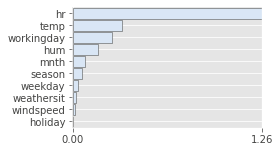

In [39]:
imp = rfpimp.importances(xgb_final, test_x, test_y) # permutation
viz = rfpimp.plot_importances(imp)
viz.view()

The feature importance ranking for XGBoost is slightly different from CART and Random Forest, with SEASON ranked higher than MONTH, but otherwise the same.

***

## Results : Comparing three models

we will collate and compare the model performance of the three models.

In [40]:
# create a list of models
list_name_models = ['CART', 'RF', 'XGBoost']
# use the models from above
list_reg_models = [dt_final, rf_final, xgb_final]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y), model.score(train_x, train_y) - model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
df_models

,R2_train_data,R2_test_data,R2_diff
CART,0.8764,0.8185,0.0579
RF,0.9720,0.8699,0.1022
XGBoost,0.9436,0.8912,0.0524


From the summary of the scores for each model above:

Among the three models, the CART model has the lowest performance with poor generalisation ability and overfitting. Random Forest showed significant improvement in the test data compared to CART, but still suffers from overfitting. 

The XGBoost model has the highest performance on the test data and a balanced fitting effect on the training data, indicating good stability and reliability. 

Therefore, in practice, the XGBoost model is recommended for this data set, but the model choice should be adapted to the specific problem and data characteristics. Further regularisation is also needed to optimise the model performance.

***

## Conclusion and discussion

This report analyzed bike-sharing usage in Washington, DC, and found that temperature, humidity, weather conditions, time of day, day of the week, and season impact bike-sharing usage. Commuting to work is the primary demand for bike-sharing, as shown in the morning and evening peak periods.

Machine learning outperformed linear regression due to its ability to capture non-linear relationships in the data. CART was excluded due to inferior performance, while Random Forest showed overfitting and XGBoost had the best performance. L1 regularization improved XGBoost's performance slightly, and more hyperparameter combinations and regularization parameters can be tested in future applications using cross-validation.

The results of the above analysis are generally consistent with the findings in the cited paper.

## Reference

Ashqar, H.I., Elhenawy, M. and Rakha, H.A. (2019) ‘Modeling bike counts in a bike-sharing system considering the effect of weather conditions’, Case Studies on Transport Policy, 7(2), pp. 261–268. Available at: https://doi.org/10.1016/j.cstp.2019.02.011.

E, S.V., Park, J. and Cho, Y. (2020) ‘Using data mining techniques for bike sharing demand prediction in metropolitan city’, Computer Communications, 153, pp. 353–366. Available at: https://doi.org/10.1016/j.comcom.2020.02.007.

Gao, C. and Chen, Y. (2022) ‘Using Machine Learning Methods to Predict Demand for Bike Sharing’, in J.L. Stienmetz, B. Ferrer-Rosell, and D. Massimo (eds) Information and Communication Technologies in Tourism 2022. Cham: Springer International Publishing, pp. 282–296. Available at: https://doi.org/10.1007/978-3-030-94751-4_25.